In [2]:
# Load the data
import csv
import numpy as np
from pprint import pprint
import os

path = os.listdir("./data")[0]
with open(f"./data/{path}") as fin:
    reader = csv.reader(fin, delimiter=",")
    raw_data = list(reader)

    def convert(raw_data):
        return -1 if raw_data == "" else int(raw_data)

    data = []
    for row in raw_data[1:]:
        data.append([])
        for col in range(3, len(raw_data[0]) - 2):
            data[-1].append(convert(row[col]))
    
    mat = np.array(data)

print(mat, mat.shape)
print(np.sum(mat == -1))

[[-1 -1 -1 ...  7 -1 -1]
 [ 7  5 -1 ...  1  3  1]
 [ 5  2 -1 ...  4  6  3]
 ...
 [ 4  1  1 ...  7  3  2]
 [ 2  2 -1 ... -1 -1 -1]
 [ 3  6 -1 ...  4 -1 -1]] (65, 50)
325


In [3]:
# Get people labels
import re

pattern = r".*?\[(.*)].*"
people_labels = [row[2] for row in raw_data[1:]]

In [4]:
import numpy as np
def test():
    M = [[3, 10, 2, 9, 3, -1, -1, 4],
         [3, -1, -1, 4, 9, 2, 3, 1],
         [4, -1, 2, 4, 3, 5, 1, -1],
         [-1, -1, -1, 8, 0, 2, -1, 1],
         [1, 1, -1, 1, 2, 2, -1, -1],
         [4, 4, 4, -1, -1, 10, 10, 10]]
    M = np.array(M, dtype="float")
    return matrixComplete(M, -1, 100000)
    
def matrixComplete(M, missingLabel, steps=1000):
    missing = (M == missingLabel)
    predictions = np.where(missing, np.random.random(size=M.shape), 0)
    rate = 0.01 # totally unused but good for experiments I think
    i = 0
    while True:
        i += 1
        predictedMatrix = np.where(missing, predictions, M)
        if i == steps: return predictedMatrix
        u,s,vT = np.linalg.svd(predictedMatrix)
        if i%(steps//20)==0: print(np.sum(np.abs(s)), rate)
        diag = np.zeros((u.shape[0], vT.shape[0]))
        for j in range(min(diag.shape)): diag[j,j] = 1.0
        derivative = np.where(missing, u @ diag @ vT, 0)
        predictions -= 0.1*derivative
        
        while NuclearNorm(predictedMatrix - rate*derivative) >\
           NuclearNorm(predictedMatrix):
            rate /= 1.1
        else:
            rate *= 1.05

def NuclearNorm(M):
    u,s,v = np.linalg.svd(M)
    return np.sum(np.abs(s))

In [6]:
# Clean up the data a little
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

mean = np.nanmean(mat)
n_foods, n_people = mat.shape

print(f"Mean of nonzero entries: {mean}")
print(f"Count of nonzero entries: {np.count_nonzero(~np.isnan(data))}")

print("Number of entries to fill", np.sum(mat == -1))
mat = matrixComplete(mat, -1, 1000)

# Normalize
# Standardize features?
def fit_rows(mat):
    return StandardScaler().fit_transform(mat)

def fit_cols(mat):
    return StandardScaler().fit_transform(mat.T).T

for i in range(10):
    mat = fit_rows(mat)
    mat = fit_cols(mat)

np.set_printoptions(threshold=np.inf)

# for row in mat.T[:10]:
#     print(np.mean(row), np.var(row))

Mean of nonzero entries: 3.9033846153846152
Count of nonzero entries: 3250
Number of entries to fill 325
780.995656395441 0.10921333129289235
760.758609927673 1.2523929318695617
747.7898412521722 14.361690438600458
739.5251677380986 32.58328500765888
734.189210787149 34.4859895107709
730.6850790826762 36.49980265210989
728.3665074902374 35.11928421163286
726.8311994319871 37.17007866651479
725.8135621673374 39.340629488605984
725.1362477455147 41.63792986410944
724.6822932005219 44.069381347103835
724.3755250432832 46.642817706230495
724.1665124827384 44.87866378537264
724.023029165943 47.49935828127772
723.9238743484957 50.27308851981791
723.8549559874829 48.37162821815979
723.806813158164 51.19629475537107
723.7730364912674 49.25991636813613
723.7496700570615 0.1286477899241863


In [7]:
# Let's do some PCA!
from sklearn.decomposition import PCA
pca_2d = PCA(n_components=2)
pca_3d = PCA(n_components=3)

pc_2 = pca_2d.fit_transform(mat)
pc_3 = pca_3d.fit_transform(mat)

6

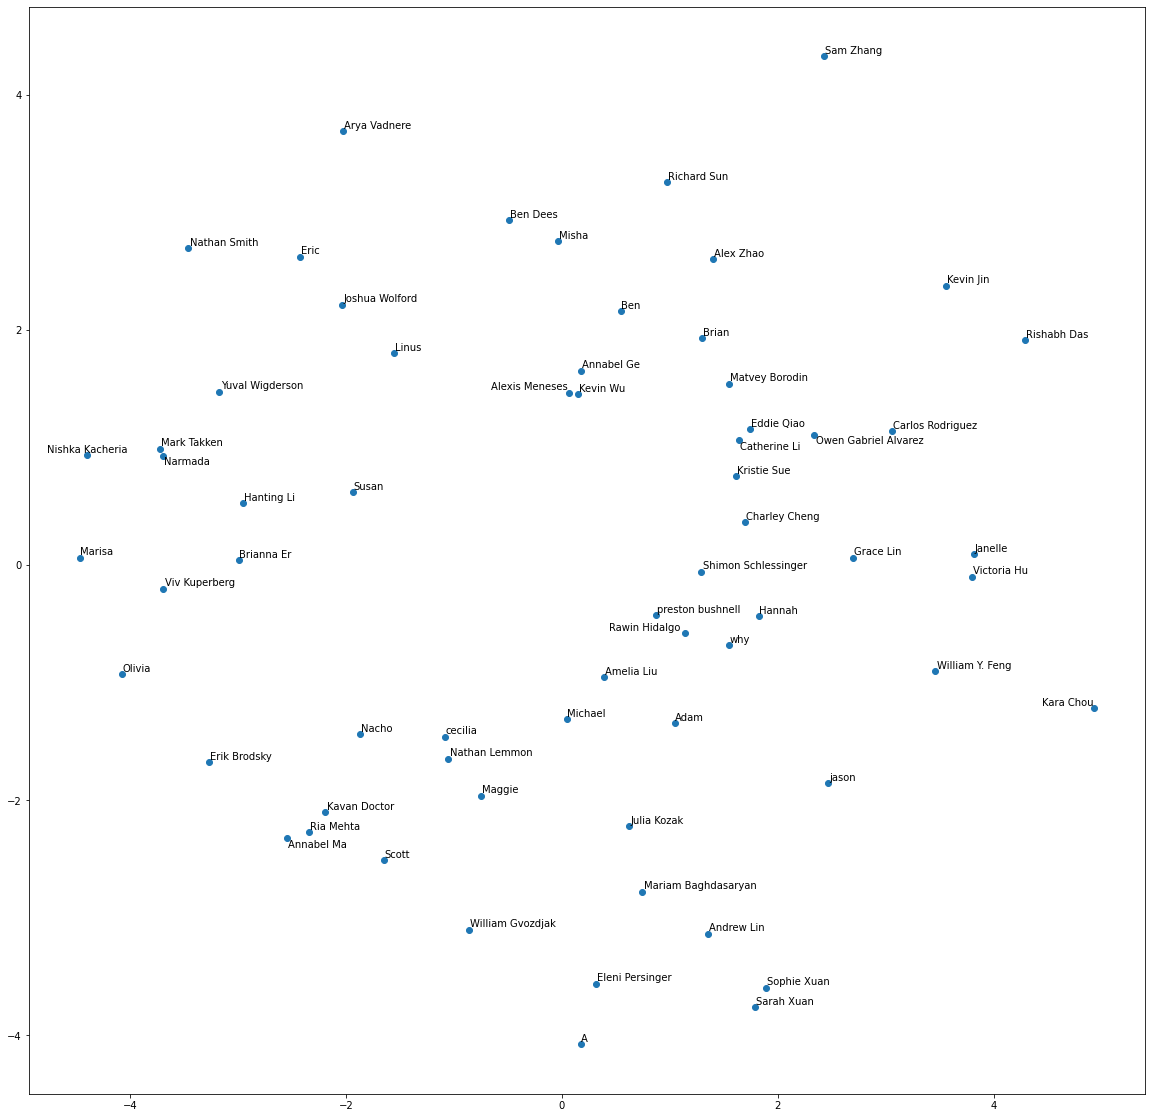

In [9]:
from matplotlib import pyplot as plt
from adjustText import adjust_text

fig = plt.figure(figsize=(20, 20))

#plot_3d = fig.add_subplot(2, 2, 1, projection="3d")
#plot_3d.scatter(*pc_3.T)

plot_2d = fig.add_subplot()
plot_2d.scatter(*pc_2.T)

labels = []
for food, coords in zip(people_labels, pc_2):
    labels.append(plt.text(coords[0], coords[1], food, ha="left", va="top"))

adjust_text(labels)

# Let's find cool correlations

In [ ]:
def correlation(food1, food2):
    idx_1 = food_labels.index(food1)
    idx_2 = food_labels.index(food2)

    x = mat[idx_1]
    y = mat[idx_2]

    plt.scatter(x, y)
    plt.xlabel(food1)
    plt.ylabel(food2)

    #calculate equation for trendline
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)

    #add trendline to plot
    plt.plot(x, p(x), 'g')


correlation("Chocolate", "Water")